<a href="https://colab.research.google.com/github/mohamedssafini/deepLearning/blob/main/deepLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install -U d2l

In [4]:
%matplotlib inline
import math
import time
import numpy as np
import tensorflow as tf
from d2l import tensorflow as d2l
import random

In [5]:
def normal(x, mu, sigma):
    p = 1 / math.sqrt(2 * math.pi * sigma**2)
    return p * np.exp(-0.5 / sigma**2 * (x - mu)**2)

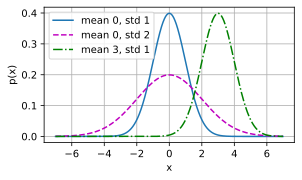

In [6]:
# Use numpy again for visualization
x = np.arange(-7, 7, 0.01)

# Mean and standard deviation pairs
params = [(0, 1), (0, 2), (3, 1)]
d2l.plot(x, [normal(x, mu, sigma) for mu, sigma in params], xlabel='x',
         ylabel='p(x)', figsize=(4.5, 2.5),
         legend=[f'mean {mu}, std {sigma}' for mu, sigma in params])

In [7]:
def synthetic_data(w, b, num_examples):  
    """Generate y = Xw + b + noise."""
    X = tf.zeros((num_examples, w.shape[0]))
    X += tf.random.normal(shape=X.shape)
    y = tf.matmul(X, tf.reshape(w, (-1, 1))) + b
    y += tf.random.normal(shape=y.shape, stddev=0.01)
    y = tf.reshape(y, (-1, 1))
    return X, y

true_w = tf.constant([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

In [8]:
print('features:', features[0], '\nlabel:', labels[0])

features: tf.Tensor([-0.70941967 -1.3640877 ], shape=(2,), dtype=float32) 
label: tf.Tensor([7.4170885], shape=(1,), dtype=float32)


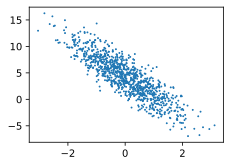

In [9]:
d2l.set_figsize()
# The semicolon is for displaying the plot only
d2l.plt.scatter(features[:, (1)].numpy(), labels.numpy(), 1);

In [10]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # The examples are read at random, in no particular order
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        j = tf.constant(indices[i:min(i + batch_size, num_examples)])
        yield tf.gather(features, j), tf.gather(labels, j)

In [11]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # The examples are read at random, in no particular order
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        j = tf.constant(indices[i:min(i + batch_size, num_examples)])
        yield tf.gather(features, j), tf.gather(labels, j)

In [12]:
batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tf.Tensor(
[[-0.23997733  2.0276515 ]
 [-0.40703645 -0.04500366]
 [ 0.6824673   0.20645659]
 [-0.8827079  -0.90480983]
 [-1.3390102  -0.11457703]
 [-0.83939356  0.6523511 ]
 [ 0.17429666  0.26366234]
 [-0.2645533   1.2511419 ]
 [ 0.5321529  -0.4979702 ]
 [-0.5233556  -1.9573721 ]], shape=(10, 2), dtype=float32) 
 tf.Tensor(
[[-3.1901443]
 [ 3.5263574]
 [ 4.8562136]
 [ 5.5248094]
 [ 1.9223787]
 [ 0.2958081]
 [ 3.6431813]
 [-0.5853949]
 [ 6.938883 ]
 [ 9.821857 ]], shape=(10, 1), dtype=float32)


In [14]:
w = tf.Variable(tf.random.normal(shape=(2, 1), mean=0, stddev=0.01),
                trainable=True)
b = tf.Variable(tf.zeros(1), trainable=True)

In [16]:
print(w)

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[-0.00066615],
       [-0.00415623]], dtype=float32)>
<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>


In [17]:
print(b)

<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>


In [19]:
def linreg(X, w, b):
    """The linear regression model."""
    return tf.matmul(X, w) + b

In [23]:
def squared_loss(y_hat, y): 
    """Squared loss."""
    return (y_hat - tf.reshape(y, y_hat.shape))**2 / 2

In [24]:
def sgd(params, grads, lr, batch_size): 
    """Minibatch stochastic gradient descent."""
    for param, grad in zip(params, grads):
        param.assign_sub(lr * grad / batch_size)

In [25]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        with tf.GradientTape() as g:
            l = loss(net(X, w, b), y)  # Minibatch loss in `X` and `y`
        # Compute gradient on l with respect to [`w`, `b`]
        dw, db = g.gradient(l, [w, b])
        # Update parameters using their gradient
        sgd([w, b], [dw, db], lr, batch_size)
    train_l = loss(net(features, w, b), labels)
    print(f'epoch {epoch + 1}, loss {float(tf.reduce_mean(train_l)):f}')

epoch 1, loss 0.041211
epoch 2, loss 0.000159
epoch 3, loss 0.000053


In [26]:
print(f'error in estimating w: {true_w - tf.reshape(w, true_w.shape)}')
print(f'error in estimating b: {true_b - b}')

error in estimating w: [-8.225441e-05 -6.060600e-04]
error in estimating b: [0.00090313]
